In [1]:
print("hello")


hello


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/nba_2024_per_game_stats.csv")

# Quick inspection
print(df.head())
print(df.info())


    Rk                   Player   Age Team Pos     G    GS    MP    FG   FGA  \
0  1.0              Joel Embiid  29.0  PHI   C  39.0  39.0  33.6  11.5  21.8   
1  2.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  37.5  11.5  23.6   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  35.2  11.5  18.8   
3  4.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  34.0  10.6  19.8   
4  5.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  35.4  10.3  21.4   

   ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.883  2.4  8.6  11.0  5.6  1.2  1.7  3.8  2.9  34.7  
1  ...  0.786  0.8  8.4   9.2  9.8  1.4  0.5  4.0  2.1  33.9  
2  ...  0.657  2.7  8.8  11.5  6.5  1.2  1.1  3.4  2.9  30.4  
3  ...  0.874  0.9  4.7   5.5  6.2  2.0  0.9  2.2  2.5  30.1  
4  ...  0.847  0.6  3.1   3.6  6.7  0.9  0.2  2.4  1.9  28.7  

[5 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 30 columns):
 #   Column  

In [7]:
df.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
# Statistical summary of numeric columns
print(df.describe())

# Top players by various metrics
top_scorers = df.nlargest(5, 'PTS')[['Player', 'PTS']]
print("Top Scorers:\n", top_scorers)


               Rk         Age           G          GS          MP          FG  \
count  735.000000  735.000000  735.000000  735.000000  735.000000  735.000000   
mean   290.189116   26.155102   40.880272   18.440816   18.264762    2.972789   
std    157.095342    4.371745   25.581293   25.024108    9.735524    2.356999   
min      1.000000   19.000000    1.000000    0.000000    0.500000    0.000000   
25%    162.500000   23.000000   17.000000    0.000000   10.600000    1.300000   
50%    293.000000   25.000000   41.000000    5.000000   17.200000    2.300000   
75%    423.000000   29.000000   64.500000   29.000000   26.450000    4.150000   
max    572.000000   39.000000   84.000000   82.000000   37.800000   11.500000   

              FGA         FG%          3P         3PA  ...         FT%  \
count  735.000000  728.000000  735.000000  735.000000  ...  677.000000   
mean     6.423401    0.447595    0.909116    2.582449  ...    0.749721   
std      4.783384    0.110629    0.848969    2.1

In [8]:
# Points per game (PPG), assists per game (APG), rebounds per game (RPG)
df['PPG'] = df['PTS'] / df['G']
df['APG'] = df['AST'] / df['G']
df['RPG'] = df['TRB'] / df['G']

# Efficiency: Weighted sum of shooting percentages
df['Efficiency'] = (df['FG%'] + df['3P%'] + df['FT%']) / 3

# Top 5 efficient players
top_efficient = df.nlargest(5, 'Efficiency')[['Player', 'Efficiency']]
print("Top Efficiency:\n", top_efficient)


Top Efficiency:
              Player  Efficiency
423     Luke Kornet    0.869000
436    Drew Eubanks    0.791667
655     Jordan Ford    0.746000
350  David Duke Jr.    0.685333
679   Jordan Miller    0.685333


Team Stats:
         PTS    TRB    AST
Team                     
2TM   513.5  215.8  130.1
MEM   284.1  129.3   75.0
DET   258.2  101.7   53.9
TOR   248.0  103.7   67.8
CHO   241.8   91.8   63.6
PHI   203.9   81.0   48.1
POR   196.7   82.0   46.1
UTA   194.4   81.3   47.0
NYK   193.4   77.5   38.2
WAS   187.3   78.5   43.6
DAL   186.4   74.3   39.2
MIA   184.8   69.1   46.1
IND   183.1   62.4   44.1
ATL   174.9   69.3   40.1
BRK   174.2   75.1   47.3
SAS   165.1   68.1   43.5
PHO   164.5   67.6   38.3
BOS   162.0   66.9   35.9
CHI   161.3   66.7   32.9
LAC   160.6   66.0   38.0
CLE   160.0   61.2   40.6
NOP   155.0   61.1   35.9
MIL   152.8   58.3   36.6
LAL   152.2   57.5   38.1
OKC   151.5   56.8   37.5
HOU   150.1   64.6   31.2
GSW   147.6   62.1   39.5
SAC   142.7   55.9   34.5
MIN   142.5   55.1   33.6
ORL   138.1   55.0   31.4
DEN   136.7   53.6   35.4
3TM    29.0   11.5    8.5


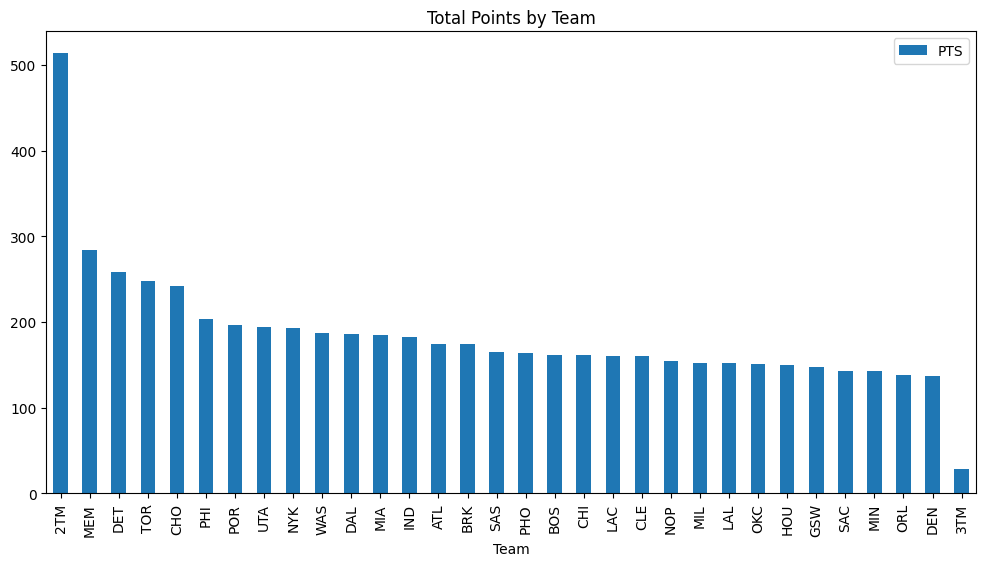

In [9]:
# Total points, rebounds, and assists by team
team_stats = df.groupby('Team').sum()[['PTS', 'TRB', 'AST']]
team_stats = team_stats.sort_values(by='PTS', ascending=False)
print("Team Stats:\n", team_stats)

# Visualization
team_stats[['PTS']].plot(kind='bar', figsize=(12, 6), title="Total Points by Team")
plt.show()


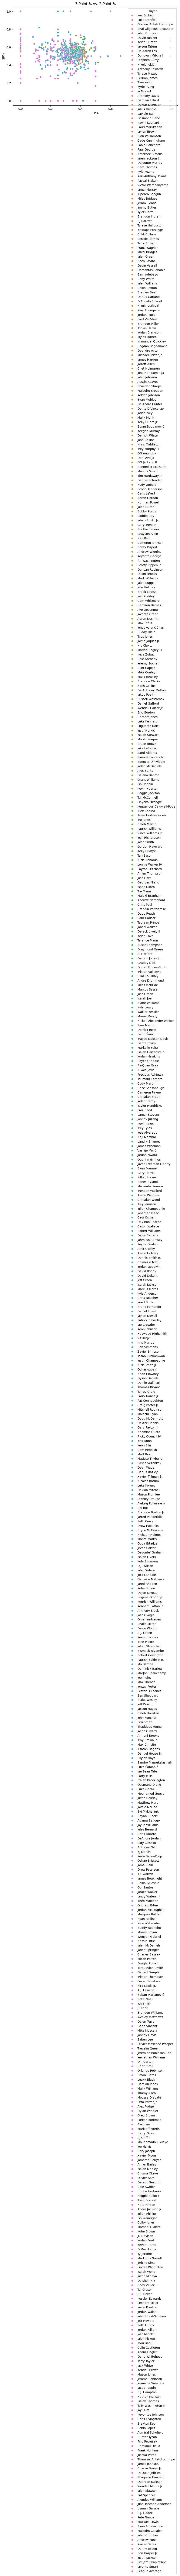

In [10]:
# Comparison of 3P% vs 2P%
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='3P%', y='2P%', hue='Player')
plt.title("3-Point % vs. 2-Point %")
plt.show()


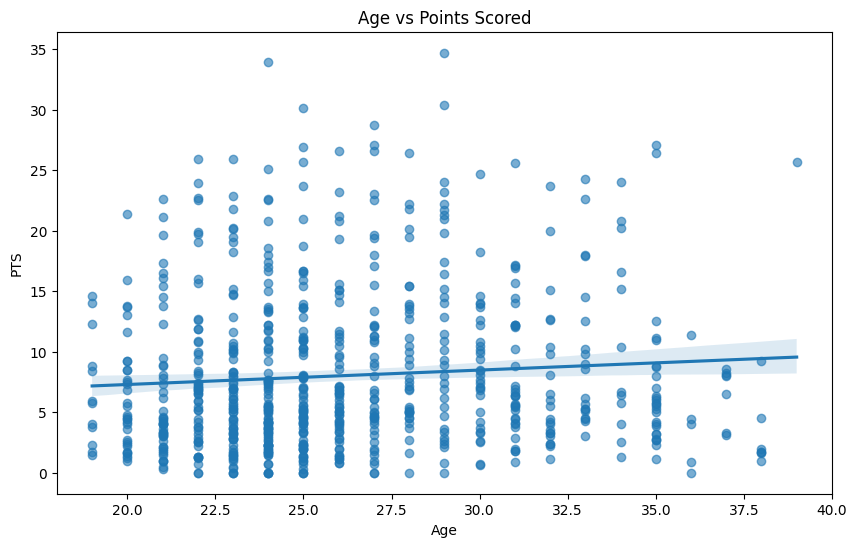

In [14]:
# Relation between Age and PTS
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='PTS', scatter_kws={'alpha':0.6})
plt.title("Age vs Points Scored")
plt.show()


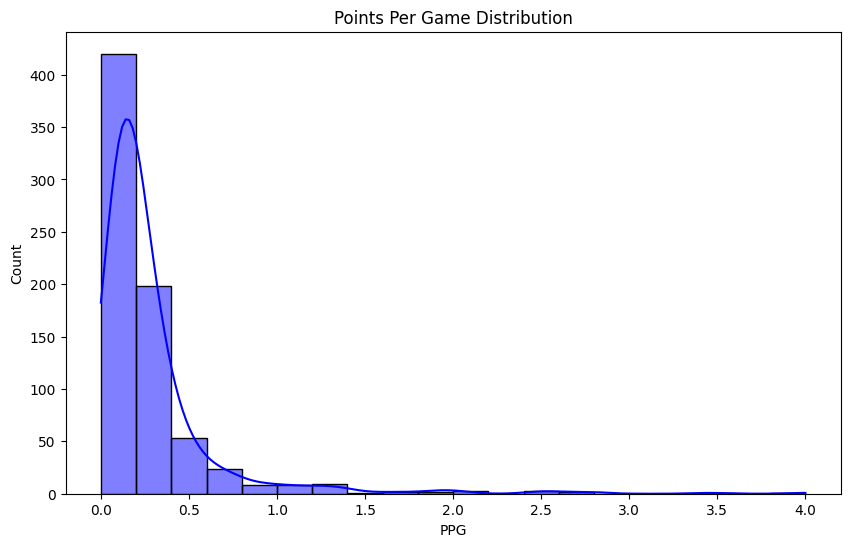

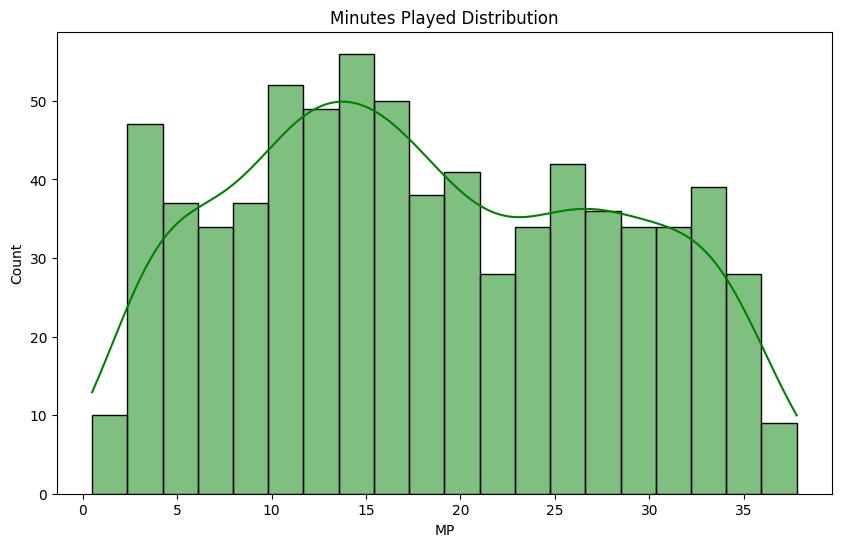

In [13]:
# Points per game
plt.figure(figsize=(10, 6))
sns.histplot(df['PPG'], kde=True, bins=20, color='blue')
plt.title("Points Per Game Distribution")
plt.show()

# Minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['MP'], kde=True, bins=20, color='green')
plt.title("Minutes Played Distribution")
plt.show()


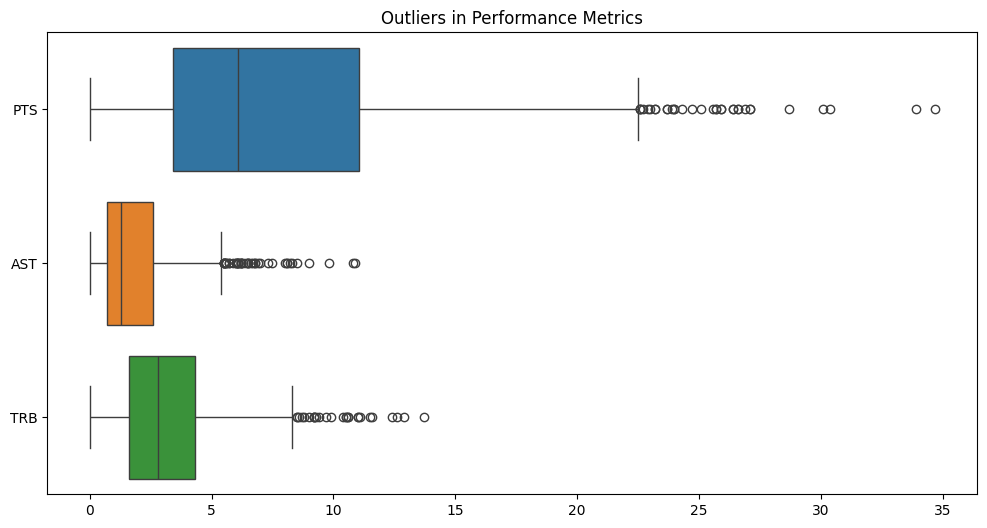

In [16]:
# Boxplot for points, assists, and rebounds
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PTS', 'AST', 'TRB']], orient='h')
plt.title("Outliers in Performance Metrics")
plt.show()


In [17]:
# Standard deviation for player points
df['PTS_std'] = df.groupby('Player')['PTS'].transform('std')
print("Consistency (Std Dev) in Points:\n", df[['Player', 'PTS_std']].dropna().sort_values(by='PTS_std'))


Consistency (Std Dev) in Points:
                  Player   PTS_std
504      Troy Brown Jr.  0.000000
505      Troy Brown Jr.  0.000000
506      Troy Brown Jr.  0.000000
281    Precious Achiuwa  0.057735
282    Precious Achiuwa  0.057735
..                  ...       ...
459  Kenneth Lofton Jr.  5.725964
460  Kenneth Lofton Jr.  5.725964
202       Dalano Banton  7.214800
201       Dalano Banton  7.214800
200       Dalano Banton  7.214800

[241 rows x 2 columns]


In [19]:
# Weighted scoring for MVP ranking
df['MVP_Score'] = (0.5 * df['PTS']) + (0.3 * df['AST']) + (0.2 * df['TRB'])
mvp_candidates = df.nlargest(5, 'MVP_Score')[['Player', 'MVP_Score']]
print("Top MVP Candidates:\n", mvp_candidates)


Top MVP Candidates:
                      Player  MVP_Score
1               Luka Dončić      21.73
0               Joel Embiid      21.23
2     Giannis Antetokounmpo      19.45
11             Nikola Jokić      18.38
3   Shai Gilgeous-Alexander      18.01


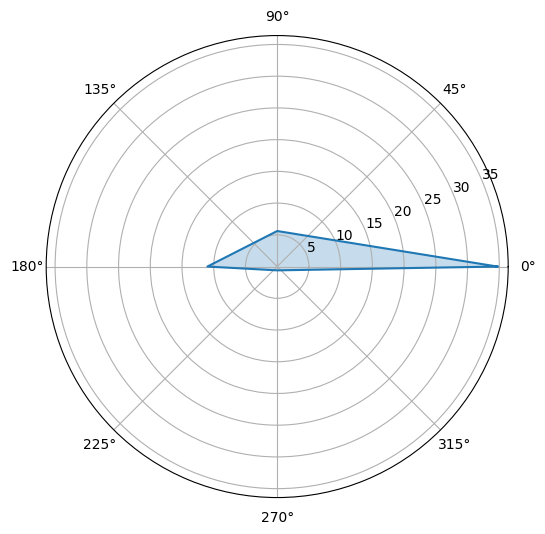

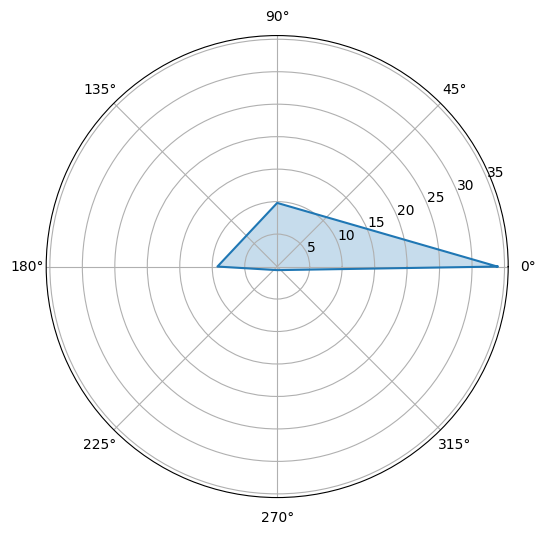

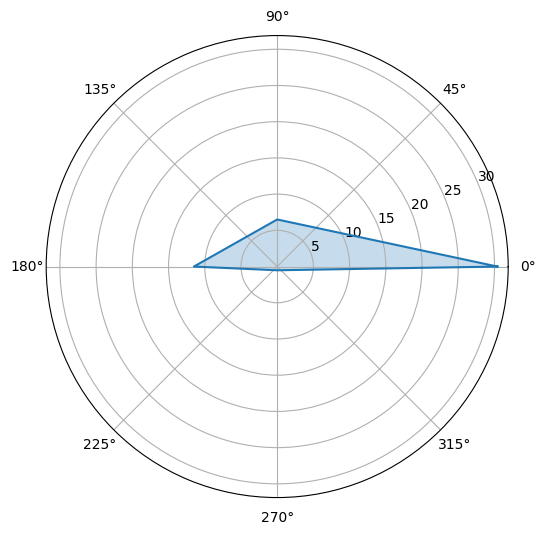

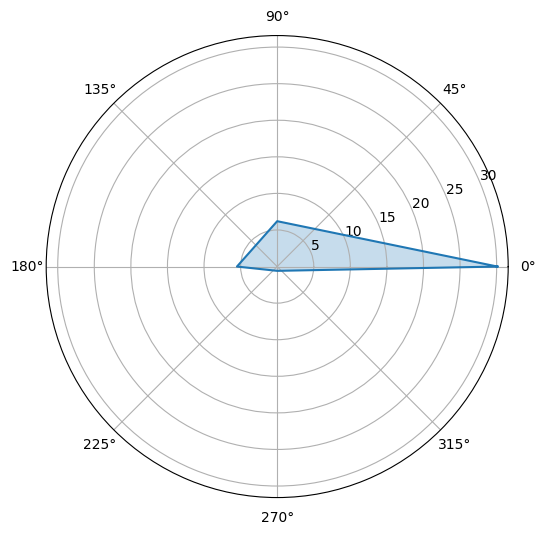

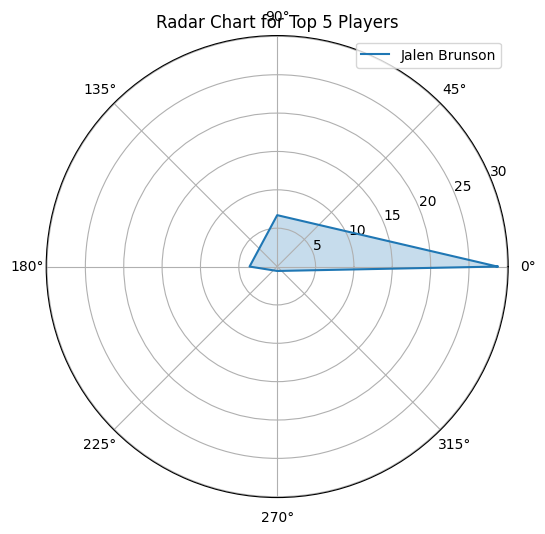

In [20]:
# Radar chart for top 5 players (PTS, AST, TRB, Efficiency)
from math import pi
import numpy as np

top5 = df.nlargest(5, 'PTS')[['Player', 'PTS', 'AST', 'TRB', 'Efficiency']]
categories = ['PTS', 'AST', 'TRB', 'Efficiency']

# Radar chart for each player
for _, player in top5.iterrows():
    values = player[categories].tolist()
    values += values[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    plt.polar(angles, values, label=player['Player'])
    plt.fill(angles, values, alpha=0.25)

plt.legend()
plt.title("Radar Chart for Top 5 Players")
plt.show()


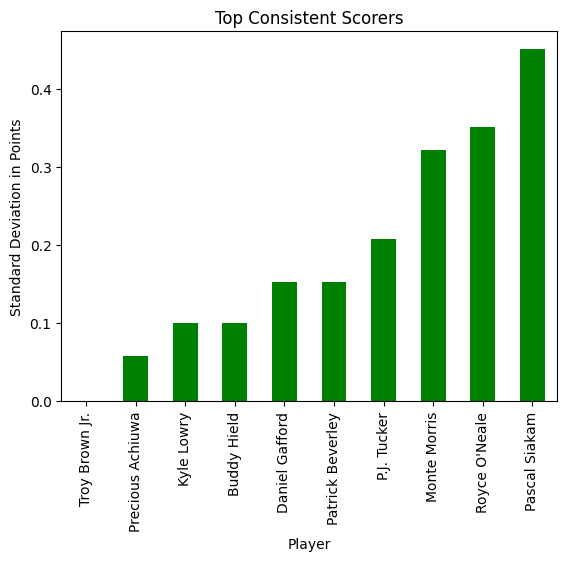

In [25]:
nba_data['PTS_std_dev'] = nba_data.groupby('Player')['PTS'].transform('std')
consistent_players = nba_data.groupby('Player')['PTS_std_dev'].mean().sort_values()

consistent_players.head(10).plot(kind='bar', color='green', title="Top Consistent Scorers")
plt.ylabel("Standard Deviation in Points")
plt.show()



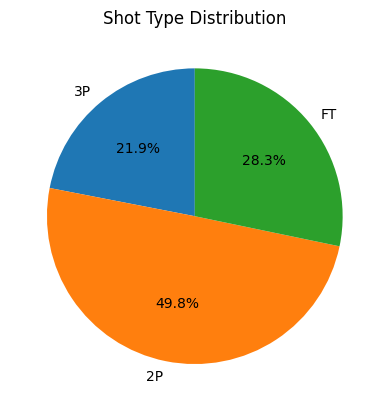

In [28]:
shot_distribution = nba_data[['3P', '2P', 'FT']].sum()
shot_distribution.plot(kind='pie', autopct='%1.1f%%', title="Shot Type Distribution", startangle=90)
plt.ylabel("")
plt.show()



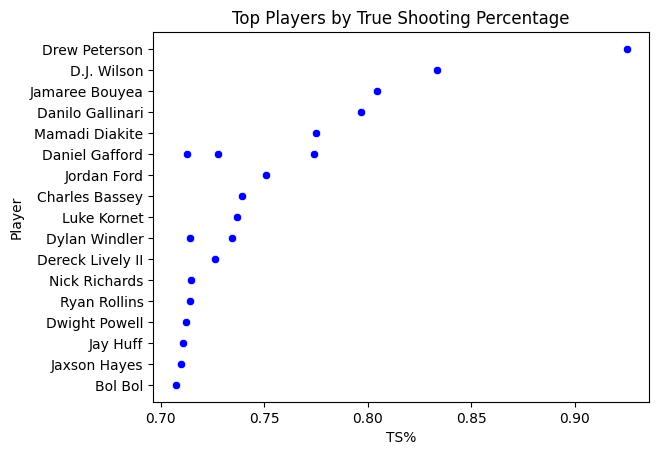

In [34]:
nba_data['TS%'] = nba_data['PTS'] / (2 * (nba_data['FGA'] + 0.44 * nba_data['FTA']))
efficiency = nba_data[['Player', 'TS%']].sort_values(by='TS%', ascending=False)

sns.scatterplot(data=efficiency.head(20), x='TS%', y='Player', color='blue')
plt.title("Top Players by True Shooting Percentage")
plt.show()


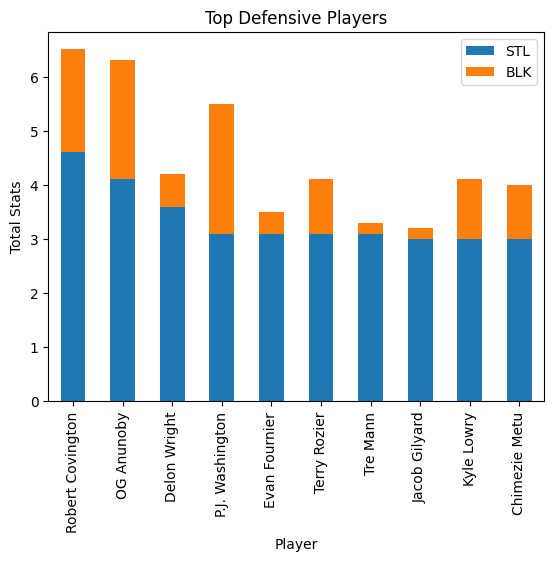

In [36]:
defensive_stats = nba_data.groupby('Player')[['STL', 'BLK']].sum().sort_values(by='STL', ascending=False)

defensive_stats.head(10).plot(kind='bar', stacked=True, title="Top Defensive Players")
plt.ylabel("Total Stats")
plt.show()


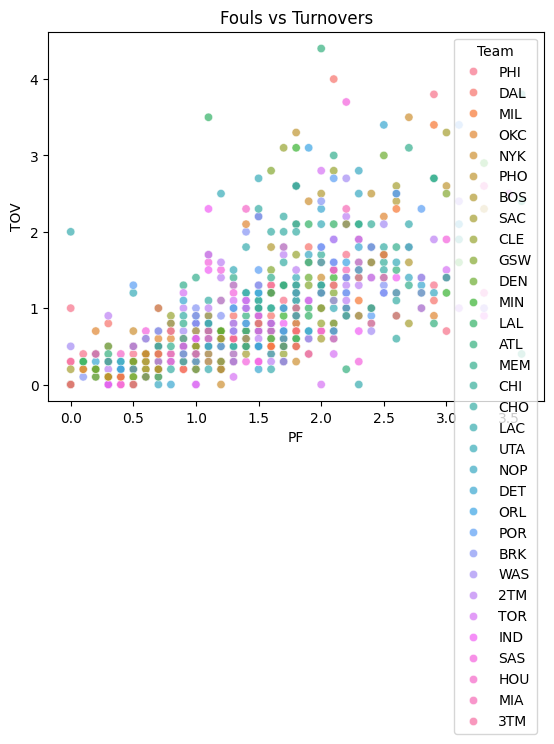

In [37]:
sns.scatterplot(data=nba_data, x='PF', y='TOV', hue='Team', alpha=0.7)
plt.title("Fouls vs Turnovers")
plt.show()


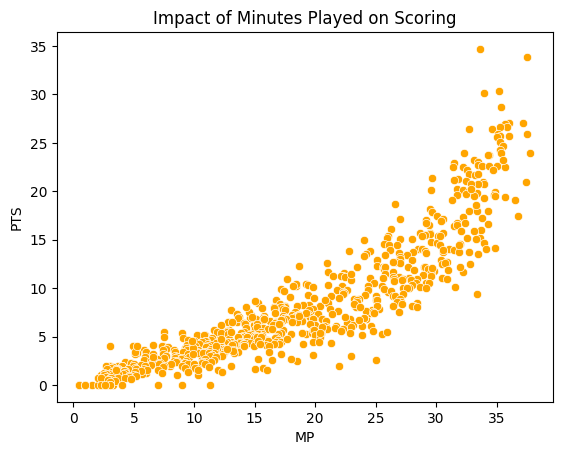

In [38]:
sns.scatterplot(data=nba_data, x='MP', y='PTS', color='orange')
plt.title("Impact of Minutes Played on Scoring")
plt.show()
